# Week 5

In [1]:
import pandas as pd

In [4]:
srs = pd.Series([7, 'Bristol', 3.14, -1789, 'Happy Birthday!'])
print(srs)

0                  7
1            Bristol
2               3.14
3              -1789
4    Happy Birthday!
dtype: object


In [9]:
srs[1]
print(type(srs[2]))
print(srs[2:4])
print(type(srs[2:4]))

<class 'float'>
2     3.14
3    -1789
dtype: object
<class 'pandas.core.series.Series'>


In [13]:
srs[2:4].std()

1267.2343468356594

In [14]:
srs2 = pd.Series([7, 1, 3.23, 0.88],  index=['max', 'min', 'mean', 'std'])
print(srs2)

max     7.00
min     1.00
mean    3.23
std     0.88
dtype: float64


In [17]:
print(srs2['mean'])

3.23


In [19]:
srs2.mean()

3.0275000000000003

In [20]:
srs3 = pd.Series([100, 200, 300, 400], index = ['one', 'two', 'three', 'four']) 

In [21]:
srs3 > 250

one      False
two      False
three     True
four      True
dtype: bool

In [22]:
myEastings  = pd.Series([7063197, 6708480, 6703134, 7538620], 
                        index = ['Liverpool', 'Bristol', 'Reading', 'Glasgow'])


In [23]:
myEastings

Liverpool    7063197
Bristol      6708480
Reading      6703134
Glasgow      7538620
dtype: int64

In [24]:
myEastings.loc['Liverpool':'Reading']

Liverpool    7063197
Bristol      6708480
Reading      6703134
dtype: int64

In [26]:
myEastings.iloc[0:3]

Liverpool    7063197
Bristol      6708480
Reading      6703134
dtype: int64

In [27]:
myEastings.loc[:'Reading']

Liverpool    7063197
Bristol      6708480
Reading      6703134
dtype: int64

In [30]:
myEastings.iloc[-2:]

Reading    6703134
Glasgow    7538620
dtype: int64

In [31]:
myData = {
    'id'         : [0, 1, 2, 3, 4, 5],
    'Name'       : ['Greater London', 'Greater Manchester', 'Birmingham','Edinburgh','Inverness','Lerwick'],
    'Rank'       : [1, 2, 3, 4, 5, 6],
    'Longitude'  : [-0.128, -2.245, -1.903, -3.189, -4.223, -1.145],
    'Latitude'   : [51.507, 53.479, 52.480, 55.953, 57.478, 60.155],
    'Population' : [9787426, 2705000, 1141816, 901455, 70000, 6958],
}

df = pd.DataFrame(myData)

In [32]:
print(type(df))
print()

print("Data frame:")
print(df)
print()

print("Description:")
print(df.describe())
print()

print("Information:")
print(df.info())

<class 'pandas.core.frame.DataFrame'>

Data frame:
   id                Name  Rank  Longitude  Latitude  Population
0   0      Greater London     1     -0.128    51.507     9787426
1   1  Greater Manchester     2     -2.245    53.479     2705000
2   2          Birmingham     3     -1.903    52.480     1141816
3   3           Edinburgh     4     -3.189    55.953      901455
4   4           Inverness     5     -4.223    57.478       70000
5   5             Lerwick     6     -1.145    60.155        6958

Description:
             id      Rank  Longitude   Latitude    Population
count  6.000000  6.000000   6.000000   6.000000  6.000000e+00
mean   2.500000  3.500000  -2.138833  55.175333  2.435442e+06
std    1.870829  1.870829   1.452215   3.295547  3.732124e+06
min    0.000000  1.000000  -4.223000  51.507000  6.958000e+03
25%    1.250000  2.250000  -2.953000  52.729750  2.778638e+05
50%    2.500000  3.500000  -2.074000  54.716000  1.021636e+06
75%    3.750000  4.750000  -1.334500  57.09675

In [35]:
df.set_index('id', inplace=True).max()

In [37]:
df.set_index('Name').Population.max()

9787426

In [38]:
df['Population']

id
0    9787426
1    2705000
2    1141816
3     901455
4      70000
5       6958
Name: Population, dtype: int64

In [103]:
foo = ['a', 'b', 'c', 'd', 'e']
foo[2:4]

['c', 'd']

In [42]:
df.iloc[2:4,2:4]

,Longitude,Latitude
id,,
2,-1.903,52.480
3,-3.189,55.953


In [44]:
df.loc[2:4,'Longitude':'Latitude']

,Longitude,Latitude
id,,
2,-1.903,52.480
3,-3.189,55.953
4,-4.223,57.478


In [47]:
df.loc[df.Rank < 4, 'Longitude':'Latitude']

,Longitude,Latitude
id,,
0,-0.128,51.507
1,-2.245,53.479
2,-1.903,52.480


In [ ]:
df[(df.Longitude > -1.5) & (df.Latitude > 55.0)]

In [54]:
df[~(df.Longitude > -1.5) & (df.Latitude > 55.0)]

,Name,Rank,Longitude,Latitude,Population
id,,,,,
3,Edinburgh,4,-3.189,55.953,901455
4,Inverness,5,-4.223,57.478,70000


In [68]:
df2 = df[~(df.Name=='Greater London')][['Longitude','Latitude']].copy()

In [69]:
df2['Value'] = 'Location'

In [70]:
df2

,Longitude,Latitude,Value
id,,,
1,-2.245,53.479,Location
2,-1.903,52.480,Location
3,-3.189,55.953,Location
4,-4.223,57.478,Location
5,-1.145,60.155,Location


In [71]:
fn   = '2022-sample-Crime.csv'

In [72]:
df = pd.read_csv(
    f'http://orca.casa.ucl.ac.uk/~jreades/data/{fn}.gz',
    low_memory=False) # The 'low memory' option means pandas doesn't guess data types

print("Loaded!")
print(df.shape)

Loaded!
(218662, 22)


In [77]:
!pwd

/home/jovyan/work/practicals


In [78]:
df = pd.read_csv('../data/src/2022-sample-Crime.csv', low_memory=False)

In [97]:
f"{df.shape[0]:,.25f}"

'16,955.0000000000000000000000000'

In [98]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [102]:
df.sample(frac=0.1).shape

(1696, 21)

In [104]:
df2 = pd.read_csv('../data/src/2022-Crime-data.csv.gz', low_memory=False)

In [120]:
df.columns.values

array(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic',
       'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude',
       'Location'], dtype=object)

In [118]:
lx = df.columns.to_list()
lx.insert(-3,'Datetime')
lx

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Datetime',
 'Latitude',
 'Longitude',
 'Location']

In [112]:
df2.columns = df.columns

ValueError: Length mismatch: Expected axis has 22 elements, new values have 21 elements

In [119]:
df2.columns = lx

In [123]:
df2.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Datetime,Latitude,Longitude,Location
0,10251371,HY438130,09/25/2015 08:00:00 AM,011XX W 68TH ST,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,False,False,...,16.0,68.0,04B,1169721.0,1859703.0,2015,07/30/2022 04:48:00 PM,41.770525,-87.653424,"(41.770524518, -87.653424052)"
1,10907788,JA220431,04/11/2017 03:30:00 AM,006XX S WABASH AVE,031A,ROBBERY,ARMED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,03,1176898.0,1897363.0,2017,09/07/2022 04:47:51 PM,41.873708,-87.625980,"(41.873708034, -87.625979629)"
2,12529871,JE431798,01/27/2009 12:00:00 AM,054XX N VIRGINIA AVE,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,False,True,...,40.0,4.0,02,NaN,NaN,2009,09/07/2022 04:47:51 PM,NaN,NaN,NaN
3,12184982,JD385605,07/01/2019 12:00:00 PM,044XX S HOMAN AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,14.0,58.0,17,1154431.0,1875005.0,2019,02/27/2022 03:46:31 PM,41.812833,-87.709064,"(41.812833445, -87.709064282)"
4,12252375,JD466809,04/16/2015 06:00:00 AM,057XX N KARLOV AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,...,39.0,13.0,02,NaN,NaN,2015,02/27/2022 03:46:31 PM,NaN,NaN,NaN


Text(0.5, 1.0, 'Foo')

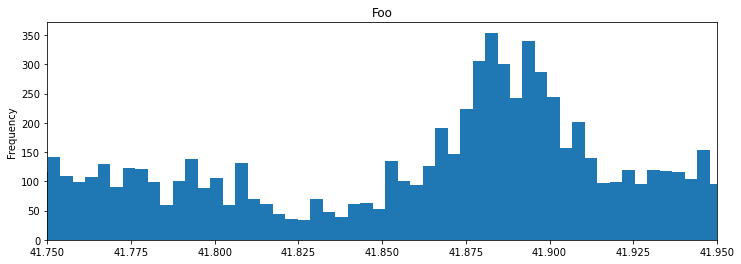

In [138]:
ax = df.Latitude.plot.hist(bins=100, figsize=(12,4))
ax.set_xlim([41.75,41.95])
ax.set_title('Foo')

<AxesSubplot:ylabel='Density'>

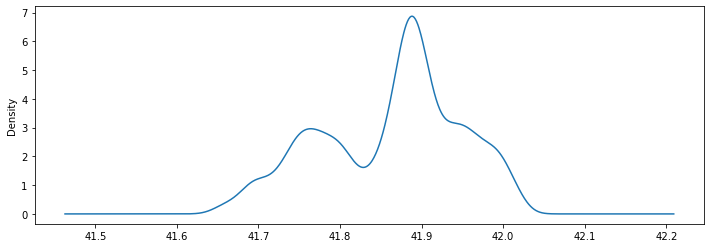

In [130]:
df.Latitude.plot.kde(figsize=(12,4))

<AxesSubplot:>

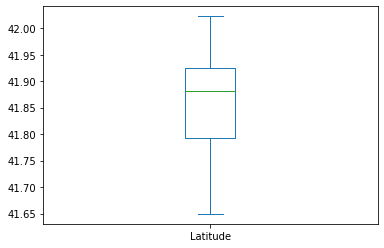

In [132]:
df.Latitude.plot.box()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['BATTERY' 'ROBBERY' 'OFFENSE INVOLVING CHILDREN' ... 'THEFT' 'NARCOTICS'
 'WEAPONS VIOLATION']

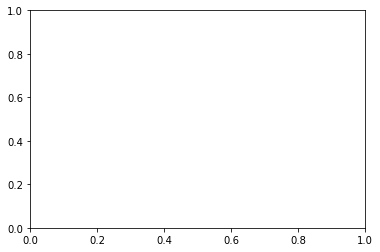

In [136]:
df2.plot.scatter(x='Longitude', y='Latitude', c='Primary Type', cmap='viridis', s=1)